## <div align="center"> UJIAN AKHIR SEMESTER IF541-F Expert System </div>
## <div align="center"> Semester Gasal 2024/2025 </div>
## <div align="center"> OPTIMASI POLA IRIGASI LAHAN PERTANIAN MENGGUNAKAN ALGORITMA GRADIENT DESCENT UNTUK EFISIENSI DISTRIBUSI AIR DAN PENINGKATAN HASIL PANEN </div>

---
### Kelompok 6

#### Anggota Kelompok :
1. Farrelius Kevin - 00000081783
2. Merhandes Gunawan - 00000081070
3. Genadi Ikhsan Jaya - 00000080773
4. Nadhila Citra - 00000072495

---

#### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Membuat Matriks Dari Dataset

In [2]:
# Data Tabel Kriteria (Kolom)
data = {
    "Topografi": [4, 5, 3, 3, 4, 4, 5, 3],
    "Biaya Implementasi": [2, 3, 5, 5, 4, 4, 2, 5],
    "Efisiensi Air": [5, 4, 3, 4, 5, 5, 2, 4],
    "Jenis Tanah": [4, 5, 5, 5, 4, 5, 3, 3],
    "Jenis Tanaman": [3, 4, 5, 5, 4, 4, 2, 5],
    "Ketersediaan Air": [5, 4, 3, 3, 4, 4, 2, 3]
}

# Data Tabel Alternatif (Baris)
alternatives = [
    "Surface Irrigation System",
    "Sprinkler Irrigation System",
    "Drip Irrigation System",
    "Subsurface Irrigation System",
    "Center Pivot Irrigation",
    "Lateral Move Irrigation System",
    "Rain Irrigation System",
    "Fog Irrigation System"
]

#### Membuat DataFrame

In [3]:
df = pd.DataFrame(data, index=alternatives)

#### Visualisasi Dataset

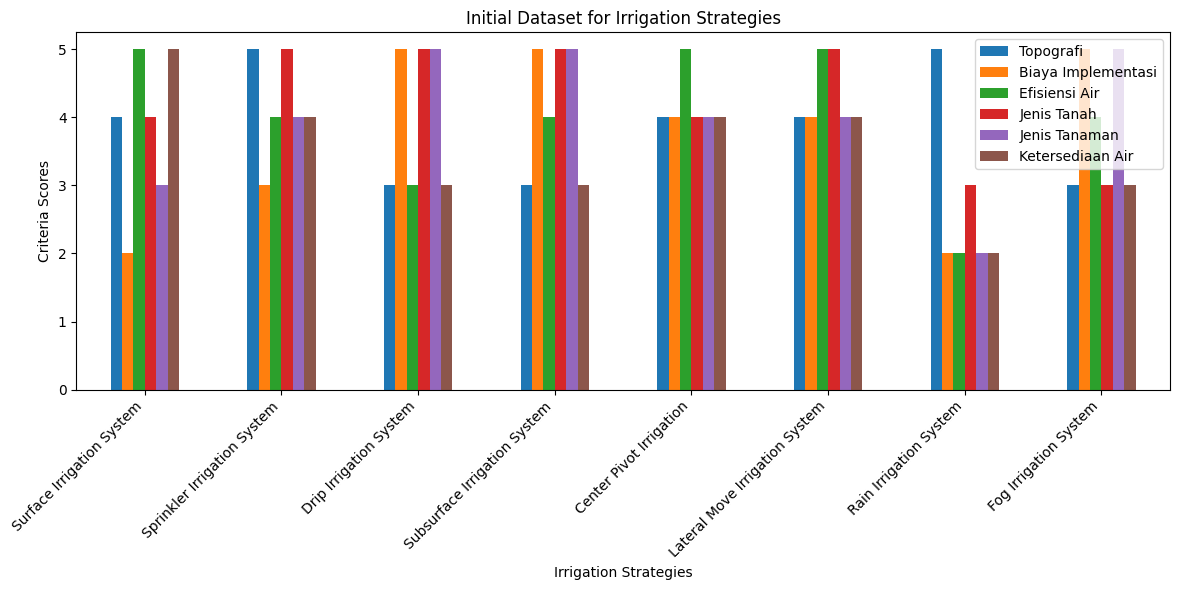

In [4]:
df.plot(kind="bar", figsize=(12, 6), 
        title="Initial Dataset for Irrigation Strategies")
plt.xlabel("Irrigation Strategies")
plt.ylabel("Criteria Scores")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Proses Algoritma Gradient Descent

#### Menentukan Bobot

In [5]:
initial_weights = np.array([0.2, 0.3, 0.2, 0.1, 0.1, 0.1])
print("Bobot : ")
print(initial_weights)

Bobot : 
[0.2 0.3 0.2 0.1 0.1 0.1]


#### Normalisasi Bobot Awal

In [6]:
initial_weights /= initial_weights.sum()

print("Bobot normalisasi:", initial_weights)

Bobot normalisasi: [0.2 0.3 0.2 0.1 0.1 0.1]


#### Membuat Fungsi Tujuan & Penalty L2 (Ridge Regularization)

In [7]:
def objective_function(weights, df, lambda_penalty=0.1):
    # Penalti L2
    penalty = lambda_penalty * np.sum(weights**2)

    # Menghitung nilai fungsi tujuan
    return -(weights @ df.mean(axis=0).values) + penalty

##### Penjelasan:

Penalty L2 regularization (Ridge) digunakan untuk menghindari bobot yang terlalu besar.

---

#### Menghitung Gradien

In [8]:
def gradient(weights, df, lambda_penalty=0.1):
    
    # Gradien dari fungsi tujuan utama
    grad = -df.mean(axis=0).values
    
    # Gradien dari penalti L2
    penalty_grad = 2 * lambda_penalty * weights  
    
    return grad + penalty_grad

#### Implementasi Algoritma Gradient Descent Untuk Optimasi Bobot

In [9]:
def gradient_descent(weights, df, learning_rate=0.01, max_iter=1000, tolerance=1e-6, lambda_penalty=0.1):
    
    history = []
    objective_values = []  

    for i in range(max_iter):
        obj_value = objective_function(weights, df, lambda_penalty)

        grad = gradient(weights, df, lambda_penalty)  
        
        weights_next = weights - learning_rate * grad  
        weights_next = np.clip(weights_next, 0, 1)  
        weights_next /= weights_next.sum()  
        
        history.append(weights_next)
        objective_values.append(obj_value)
        
        if np.linalg.norm(grad) < tolerance:
            print(f"Converged after {i + 1} iterations")
            return weights_next, history, objective_values
        
        weights = weights_next
    
    print(f"Mencapai iterasi maksimum ({max_iter})")
    return weights, history, objective_values

optimal_weights, optimization_history, objective_values = gradient_descent(
    initial_weights, df, learning_rate=0.01, max_iter=1000, tolerance=1e-6, lambda_penalty=0.1
)

print("\nOptimal Weights:\n")
for i, w in enumerate(optimal_weights):
    print(f"{df.columns[i]}: {w:.4f}")


Mencapai iterasi maksimum (1000)

Optimal Weights:

Topografi: 0.1658
Biaya Implementasi: 0.1604
Efisiensi Air: 0.1711
Jenis Tanah: 0.1818
Jenis Tanaman: 0.1711
Ketersediaan Air: 0.1497


##### Penjelasan: 

Setelah melakukan optimasi bobot dengan menggunakan **Gradient Descent**, dari hasil optimasi bobot diatas dapat diketahui bahwa bobot **Jenis Tanah** memiliki **nilai bobot tertinggi** yaitu **0.1818**, yang berarti Jenis Tanah adalah **kriteria yang paling berpengaruh** dalam optimasi ini, atau yang paling "optimal" dalam konteks pengaruhnya terhadap model atau fungsi tujuan. Selanjutnya diikuti dengan **Efisiensi Air dan Jenis Tanaman** dengan nilai **0.1711**, kemudian **Topografi** dengan nilai **0.1658**, dan **Biaya Implementasi** dengan nilai **0.1604**. Sedangkan untuk **Ketersediaan Air** merupakan **bobot terendah (0.1497)**, dianggap **lebih sedikit pengaruhnya** dibandingkan kriteria lainnya.

---

#### Visualisasi Perubahan Nilai Fungsi Tujuan

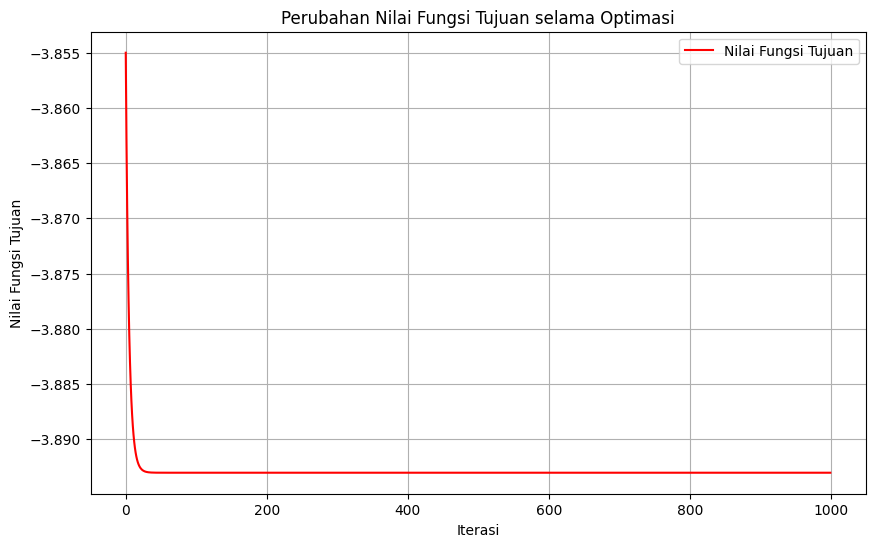

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(objective_values)), objective_values, color='r', label="Nilai Fungsi Tujuan")
plt.title("Perubahan Nilai Fungsi Tujuan selama Optimasi")
plt.xlabel("Iterasi")
plt.ylabel("Nilai Fungsi Tujuan")
plt.legend()
plt.grid()
plt.show()

##### Penjelasan :

- Dari visual diatas dapat dilihat bahwa __Fungsi Tujuan__ yang semakin negatif dalam masalah optimasi adalah karena ingin meminimalkan fungsi tujuan (loss function) untuk memperoleh hasil yang lebih baik. Fungsi tujuan semakin negatif menandakan bahwa model sedang menuju solusi yang optimal atau lebih baik.

- Ketika Fungsi Tujuan ini mulai berhenti menurun dan menjadi datar (flat) setelah beberapa iterasi, ini memberikan beberapa penanda penting mengenai proses optimasi yang terjadi dengan algoritma Gradient Descent. Ketika kurva tersebut mulai datar, menunjukkan bahwa algoritma telah mencapai **Titik Konvergensi**. Titik Konvergensi berarti model sudah sangat dekat dengan nilai minimum atau solusi optimal dari fungsi tujuan. Kurva yang tadi menurun kemudian mulai flat hingga iterasi terakhir menunjukkan bahwa algoritma telah menemukan solusi yang stabil dan tidak ada perubahan signifikan lagi. Proses optimasi telah selesai, dan tidak ada perbaikan yang lebih besar yang dapat diperoleh tanpa mengubah parameter lain seperti learning rate.

---


#### Visualisasi Proses Optimasi Bobot Dengan Gradient Descent

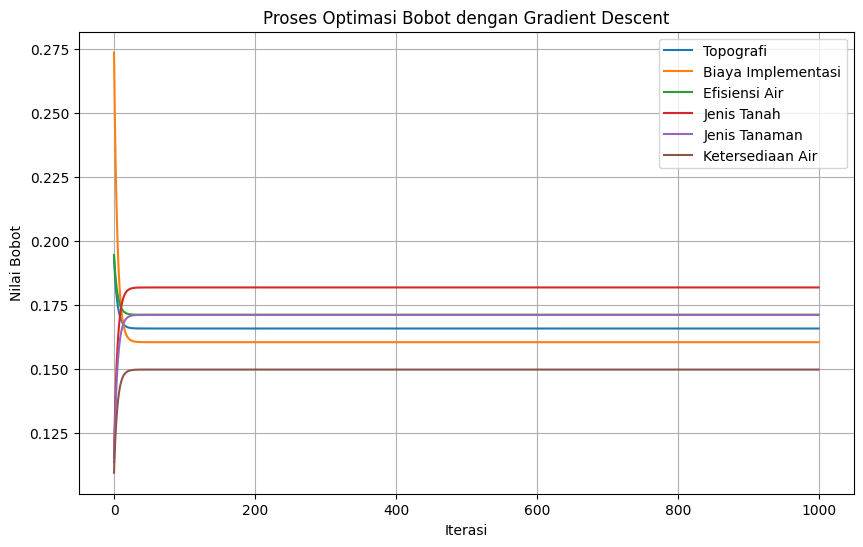

In [11]:
plt.figure(figsize=(10, 6))
optimization_history = np.array(optimization_history)
for i in range(optimization_history.shape[1]):
    plt.plot(optimization_history[:, i], label=f"{df.columns[i]}")

plt.title("Proses Optimasi Bobot dengan Gradient Descent")
plt.xlabel("Iterasi")
plt.ylabel("Nilai Bobot")
plt.legend()
plt.grid()
plt.show()

### Proses Metode MCDM Menggunakan ELECTRE

#### Menampilkan Matriks Keputusan

In [12]:
decision_matrix = df.to_numpy()
print("Matriks Keputusan")
df

Matriks Keputusan


,Topografi,Biaya Implementasi,Efisiensi Air,Jenis Tanah,Jenis Tanaman,Ketersediaan Air
Surface Irrigation System,4,2,5,4,3,5
Sprinkler Irrigation System,5,3,4,5,4,4
Drip Irrigation System,3,5,3,5,5,3
Subsurface Irrigation System,3,5,4,5,5,3
Center Pivot Irrigation,4,4,5,4,4,4
Lateral Move Irrigation System,4,4,5,5,4,4
Rain Irrigation System,5,2,2,3,2,2
Fog Irrigation System,3,5,4,3,5,3


#### Normalisasi Matriks Keputusan

In [13]:
decision_matrix = df.to_numpy()
norm_matrix = decision_matrix / np.sqrt((decision_matrix**2).sum(axis=0))
norm_df = pd.DataFrame(norm_matrix, index=alternatives, columns=data.keys())
print("Tahap 1: Normalisasi Matriks Keputusan")
norm_df

Tahap 1: Normalisasi Matriks Keputusan


,Topografi,Biaya Implementasi,Efisiensi Air,Jenis Tanah,Jenis Tanaman,Ketersediaan Air
Surface Irrigation System,0.357771,0.179605,0.428746,0.326599,0.257248,0.490290
Sprinkler Irrigation System,0.447214,0.269408,0.342997,0.408248,0.342997,0.392232
Drip Irrigation System,0.268328,0.449013,0.257248,0.408248,0.428746,0.294174
Subsurface Irrigation System,0.268328,0.449013,0.342997,0.408248,0.428746,0.294174
Center Pivot Irrigation,0.357771,0.359211,0.428746,0.326599,0.342997,0.392232
Lateral Move Irrigation System,0.357771,0.359211,0.428746,0.408248,0.342997,0.392232
Rain Irrigation System,0.447214,0.179605,0.171499,0.244949,0.171499,0.196116
Fog Irrigation System,0.268328,0.449013,0.342997,0.244949,0.428746,0.294174


#### Matriks Ternormalisasi Bobot

In [14]:
# Memberikan Hasil Optimasi Bobot Dari Gradient Descent
optimal_weights = np.array([0.1658, 0.1604, 0.1711, 0.1818, 0.1711, 0.1497])

# Melakukan Normalisasi Bobot
weighted_matrix = norm_matrix * optimal_weights
weighted_df = pd.DataFrame(weighted_matrix, index=alternatives, columns=data.keys())
print("Tahap 2: Matriks Ternormalisasi Terbobot")
weighted_df

Tahap 2: Matriks Ternormalisasi Terbobot


,Topografi,Biaya Implementasi,Efisiensi Air,Jenis Tanah,Jenis Tanaman,Ketersediaan Air
Surface Irrigation System,0.059318,0.028809,0.073359,0.059376,0.044015,0.073396
Sprinkler Irrigation System,0.074148,0.043213,0.058687,0.074220,0.058687,0.058717
Drip Irrigation System,0.044489,0.072022,0.044015,0.074220,0.073359,0.044038
Subsurface Irrigation System,0.044489,0.072022,0.058687,0.074220,0.073359,0.044038
Center Pivot Irrigation,0.059318,0.057617,0.073359,0.059376,0.058687,0.058717
Lateral Move Irrigation System,0.059318,0.057617,0.073359,0.074220,0.058687,0.058717
Rain Irrigation System,0.074148,0.028809,0.029343,0.044532,0.029343,0.029359
Fog Irrigation System,0.044489,0.072022,0.058687,0.044532,0.073359,0.044038


#### Menghitung Matriks Concordance

In [15]:
concordance_matrix = np.zeros((len(alternatives), len(alternatives)))

for i in range(len(alternatives)):
    for j in range(len(alternatives)):
        if i != j:
            concordance_matrix[i, j] = sum(
                optimal_weights[k] for k in range(len(optimal_weights))
                if weighted_matrix[i, k] >= weighted_matrix[j, k]
            )

concordance_df = pd.DataFrame(concordance_matrix, index=alternatives, columns=alternatives)
print("Tahap 3: Matriks Concordance")
concordance_df

Tahap 3: Matriks Concordance


,Surface Irrigation System,Sprinkler Irrigation System,Drip Irrigation System,Subsurface Irrigation System,Center Pivot Irrigation,Lateral Move Irrigation System,Rain Irrigation System,Fog Irrigation System
Surface Irrigation System,0.0000,0.3208,0.4866,0.4866,0.6684,0.4866,0.8341,0.6684
Sprinkler Irrigation System,0.6791,0.0000,0.6684,0.6684,0.6684,0.6684,0.9999,0.6684
Drip Irrigation System,0.5133,0.5133,0.0000,0.8288,0.5133,0.5133,0.8341,0.8288
Subsurface Irrigation System,0.5133,0.6844,0.9999,0.0000,0.5133,0.5133,0.8341,0.9999
Center Pivot Irrigation,0.8502,0.6523,0.4866,0.4866,0.0000,0.8181,0.8341,0.6684
Lateral Move Irrigation System,0.8502,0.8341,0.6684,0.6684,0.9999,0.0000,0.8341,0.6684
Rain Irrigation System,0.3262,0.1658,0.1658,0.1658,0.1658,0.1658,0.0000,0.3476
Fog Irrigation System,0.3315,0.5026,0.8181,0.8181,0.3315,0.3315,0.8341,0.0000


#### Menghitung Matriks Discordance

In [16]:
discordance_matrix = np.zeros((len(alternatives), len(alternatives)))
for i in range(len(alternatives)):
    for j in range(len(alternatives)):
        if i != j:
            discordance_matrix[i, j] = max(
                abs(weighted_matrix[i, k] - weighted_matrix[j, k])
                for k in range(len(optimal_weights))
            ) / max(abs(weighted_matrix).flatten())

discordance_df = pd.DataFrame(discordance_matrix, index=alternatives, columns=alternatives)
print("Tahap 4: Matriks Discordance")
discordance_df

Tahap 4: Matriks Discordance


,Surface Irrigation System,Sprinkler Irrigation System,Drip Irrigation System,Subsurface Irrigation System,Center Pivot Irrigation,Lateral Move Irrigation System,Rain Irrigation System,Fog Irrigation System
Surface Irrigation System,0.000000,0.200000,0.582233,0.582233,0.388155,0.388155,0.593346,0.582233
Sprinkler Irrigation System,0.200000,0.000000,0.399615,0.399615,0.200000,0.199807,0.400000,0.400000
Drip Irrigation System,0.582233,0.399615,0.000000,0.197680,0.395360,0.395360,0.593039,0.400000
Subsurface Irrigation System,0.582233,0.399615,0.197680,0.000000,0.200000,0.199807,0.593039,0.400000
Center Pivot Irrigation,0.388155,0.200000,0.395360,0.200000,0.000000,0.200000,0.593039,0.200000
Lateral Move Irrigation System,0.388155,0.199807,0.395360,0.199807,0.200000,0.000000,0.593039,0.400000
Rain Irrigation System,0.593346,0.400000,0.593039,0.593039,0.593039,0.593039,0.000000,0.593039
Fog Irrigation System,0.582233,0.400000,0.400000,0.400000,0.200000,0.400000,0.593039,0.000000


#### Menghitung Matriks Dominan Concordance dan Discordance

In [17]:
print("Tahap 5: Matriks Dominan Concordance dan Discordance\n")

# Threshold matriks Concordance dan Discordance
concordance_threshold = concordance_matrix.mean()
discordance_threshold = discordance_matrix.mean()

print("Concordance Threshold:")
print(concordance_threshold)

print("\nDiscordance Threshold:")
print(discordance_threshold)

# Matriks Dominan Concordance
dominant_concordance = (concordance_matrix >= concordance_threshold).astype(int)
print("\nMatriks Dominan Concordance:")
print(dominant_concordance)

# Matriks Dominan Discordance
dominant_discordance = (discordance_matrix <= discordance_threshold).astype(int)
print("\nMatriks Dominan Discordance:")
print(dominant_discordance)




Tahap 5: Matriks Dominan Concordance dan Discordance

Concordance Threshold:
0.5369625

Discordance Threshold:
0.35214980479727365

Matriks Dominan Concordance:
[[0 0 0 0 1 0 1 1]
 [1 0 1 1 1 1 1 1]
 [0 0 0 1 0 0 1 1]
 [0 1 1 0 0 0 1 1]
 [1 1 0 0 0 1 1 1]
 [1 1 1 1 1 0 1 1]
 [0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 1 0]]

Matriks Dominan Discordance:
[[1 1 0 0 0 0 0 0]
 [1 1 0 0 1 1 0 0]
 [0 0 1 1 0 0 0 0]
 [0 0 1 1 1 1 0 0]
 [0 1 0 1 1 1 0 1]
 [0 1 0 1 1 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 1]]


#### Menentukan Matriks Dominan Agregat

In [18]:
aggregate_dominance_matrix = dominant_concordance * dominant_discordance

aggregate_dominance_df = pd.DataFrame(aggregate_dominance_matrix, index=alternatives, columns=alternatives)

print("Tahap 6: Matriks Dominan Agregat")
aggregate_dominance_df

Tahap 6: Matriks Dominan Agregat


,Surface Irrigation System,Sprinkler Irrigation System,Drip Irrigation System,Subsurface Irrigation System,Center Pivot Irrigation,Lateral Move Irrigation System,Rain Irrigation System,Fog Irrigation System
Surface Irrigation System,0,0,0,0,0,0,0,0
Sprinkler Irrigation System,1,0,0,0,1,1,0,0
Drip Irrigation System,0,0,0,1,0,0,0,0
Subsurface Irrigation System,0,0,1,0,0,0,0,0
Center Pivot Irrigation,0,1,0,0,0,1,0,1
Lateral Move Irrigation System,0,1,0,1,1,0,0,0
Rain Irrigation System,0,0,0,0,0,0,0,0
Fog Irrigation System,0,0,0,0,0,0,0,0


In [19]:
print("Tahap 6: Matriks Dominan Agregat")
print(aggregate_dominance_matrix)

Tahap 6: Matriks Dominan Agregat
[[0 0 0 0 0 0 0 0]
 [1 0 0 0 1 1 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 1 0 0 0 1 0 1]
 [0 1 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


#### Melakukan Perankingan Alternatif

In [20]:
dominance_scores = aggregate_dominance_matrix.sum(axis=1)

final_ranking = sorted(
    zip(alternatives, dominance_scores), key=lambda x: x[1], reverse=True
)

final_ranking_df = pd.DataFrame(
    final_ranking, columns=["Alternatif", "Skor Dominan"]
)

print("Final Ranking:\n")
print(final_ranking_df)

Final Ranking:

                       Alternatif  Skor Dominan
0     Sprinkler Irrigation System             3
1         Center Pivot Irrigation             3
2  Lateral Move Irrigation System             3
3          Drip Irrigation System             1
4    Subsurface Irrigation System             1
5       Surface Irrigation System             0
6          Rain Irrigation System             0
7           Fog Irrigation System             0


#### Visualisasi Ranking Alternatif

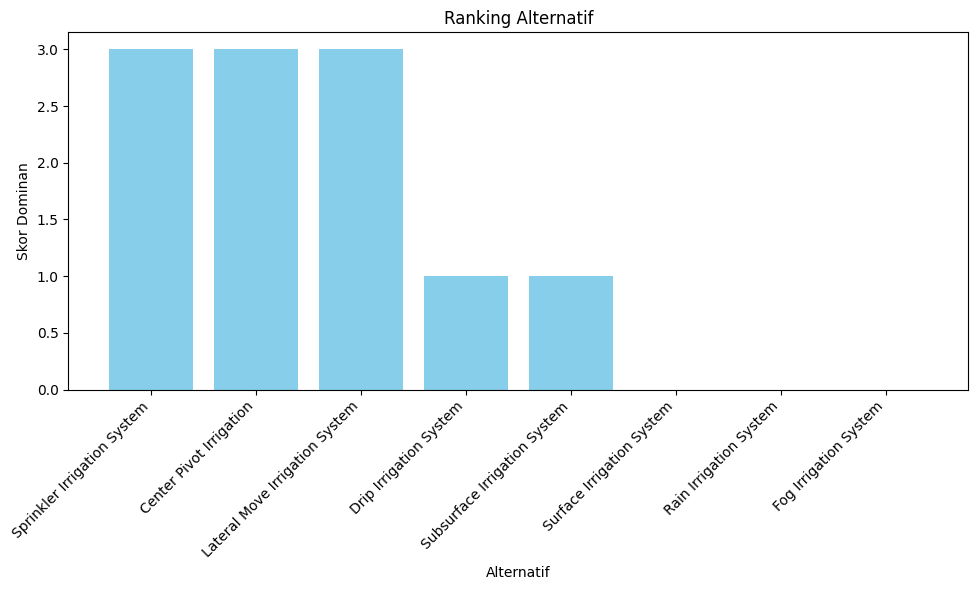

In [21]:
plt.figure(figsize=(10, 6))
plt.title("Ranking Alternatif")
plt.bar(final_ranking_df["Alternatif"], final_ranking_df["Skor Dominan"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Alternatif")
plt.ylabel("Skor Dominan")
plt.tight_layout()
plt.show()

##### Penjelasan:


- Berdasarkan hasil analisis menggunakan metode ELECTRE, ditemukan bahwa **Sistem Irigasi Terbaik** yang sangat direkomendasikan adalah **Sprinkler Irrigation System, Center Pivot Irrigation, dan Lateral Move Irrigation System** dengan skor dominan tertinggi sebesar 3. Hal ini menunjukkan bahwa ketiga sistem ini unggul di hampir semua kriteria yang dievaluasi dan memberikan performa optimal untuk memenuhi kebutuhan irigasi secara keseluruhan. 

- Sementara itu, **Drip Irrigation System dan Subsurface Irrigation System** memiliki skor dominan sebesar 1, yang mengindikasikan bahwa meskipun sistem ini memiliki keunggulan pada beberapa kriteria, kinerja keseluruhannya masih **kurang optimal** dibandingkan alternatif lain. Kedua sistem ini dapat dipertimbangkan jika terdapat kebutuhan atau kondisi tertentu yang sesuai dengan kelebihan mereka. 

- Pada sisi lain, sistem irigasi seperti **Surface Irrigation System, Rain Irrigation System, dan Fog Irrigation System** mendapatkan skor dominan 0, menunjukkan bahwa mereka **tidak memenuhi kriteria evaluasi dengan baik dan tidak direkomendasikan** sebagai solusi alternatif. Oleh karena itu, fokus implementasi sebaiknya diberikan kepada sistem irigasi dengan skor dominan tertinggi untuk memastikan efisiensi dan efektivitas dalam penggunaan sistem irigasi.

---